# Annual 30-m maps of global grassland class and extent (2000–2022) based on spatiotemporal Machine Learning

Computational notebook describing all machine learning modeling steps implemented for producing the global grassland maps (2000–2022).

## Reference point samples

First, let's retrieve the reference point samples from [Zenodo](https://doi.org/10.5281/zenodo.11280849):

In [5]:
import requests

zenodo_url = 'https://zenodo.org/records/11280849'
samples_fn = 'gpw_grassland_fscs.vi.vhr.overlaid_point.samples_20000101_20221231_go_epsg.4326_v1.pq'
samples_url = f'{zenodo_url}/files/{samples_fn}?download=1'

samples_req = requests.get(samples_url, allow_redirects=True)

print(f"Downloading {samples_fn}")
open(samples_fn, 'wb').write(samples_req.content)

664530175

The samples are organized in tabular structure and [parquet format](https://parquet.apache.org/), and [pandas](https://pandas.pydata.org/) can handle that: 

In [55]:
import pandas as pd
samples = pd.read_parquet(samples_fn)
samples

,sample_id,class,class_label,x,y,imagery,ref_date,year,ml_cv_group,ml_type,...,clm_lst_max.geom.temp_m_30m_s_m8,clm_lst_min.geom.temp_m_30m_s_m8,clm_lst_max.geom.temp_m_30m_s_m9,clm_lst_min.geom.temp_m_30m_s_m9,clm_lst_max.geom.temp_m_30m_s_m10,clm_lst_min.geom.temp_m_30m_s_m10,clm_lst_max.geom.temp_m_30m_s_m11,clm_lst_min.geom.temp_m_30m_s_m11,clm_lst_max.geom.temp_m_30m_s_m12,clm_lst_min.geom.temp_m_30m_s_m12
0,ee306b34a921c1ff345f6850683d9b43,3,Other land cover,0.453821,6.793882,Bing,2014-01-03,2014,gpw_8322,train,...,3500.0,2223.0,3436.0,2156.0,3347.0,2066.0,3253.0,1970.0,3184.0,1900.0
2,b36c15096000b1e1196d9353870fd4ab,3,Other land cover,0.456321,6.793882,Bing,2014-01-03,2014,gpw_8322,train,...,3502.0,2224.0,3437.0,2158.0,3348.0,2067.0,3254.0,1972.0,3186.0,1902.0
3,6030c825e5d3feee7efea315a9e8d5c6,3,Other land cover,0.456821,6.793882,Bing,2014-01-03,2014,gpw_8322,train,...,3502.0,2224.0,3437.0,2158.0,3348.0,2067.0,3254.0,1971.0,3185.0,1901.0
4,701a9eaa281fb0e612a72c754fde5a5c,3,Other land cover,0.457321,6.793882,Bing,2014-01-03,2014,gpw_8322,train,...,3501.0,2223.0,3436.0,2157.0,3347.0,2067.0,3253.0,1971.0,3185.0,1901.0
6,c9b53a070e273febef3ea4434029228f,3,Other land cover,0.458321,6.793882,Bing,2014-01-03,2014,gpw_8322,train,...,3500.0,2222.0,3435.0,2156.0,3347.0,2066.0,3253.0,1970.0,3184.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981122,728134387c09acd3a3e4ebba5b0cb726,3,Other land cover,126.159990,8.939386,Google,2021-07-23,2021,gpw_9425,calibration,...,3591.0,2320.0,3506.0,2233.0,3389.0,2114.0,3266.0,1988.0,3176.0,1896.0
1981195,fd1203cd3654bd83ee86158dd7c27446,3,Other land cover,126.163994,8.937387,Google,2021-07-23,2021,gpw_9425,calibration,...,3597.0,2325.0,3512.0,2238.0,3395.0,2120.0,3271.0,1994.0,3181.0,1902.0
1980973,f5d89cd29bcdbc4f8dba5274320c2d9b,3,Other land cover,126.159990,8.943886,Google,2021-07-23,2021,gpw_9425,calibration,...,3611.0,2340.0,3526.0,2253.0,3409.0,2134.0,3286.0,2008.0,3196.0,1916.0
1981192,d363b691dcd1c5e170fa55ec79733028,3,Other land cover,126.161490,8.937387,Google,2021-07-23,2021,gpw_9425,calibration,...,3597.0,2325.0,3511.0,2238.0,3395.0,2119.0,3271.0,1994.0,3181.0,1902.0


### Visualization

Let's visualize the grassland samples using [seaborn](https://seaborn.pydata.org/) and [matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

In [21]:
import seaborn as sns
sns.set_theme(context='talk', style="whitegrid")

What is temporal distribution per class?

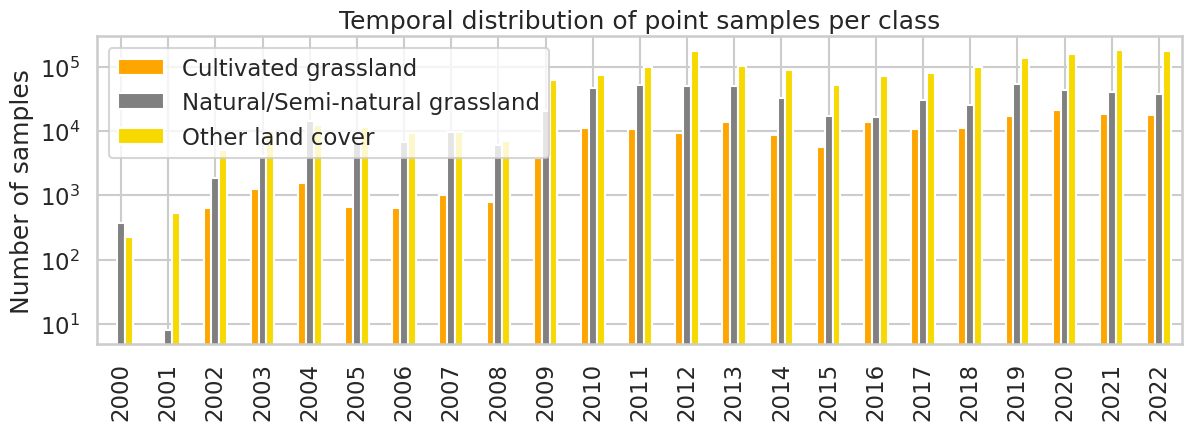

In [30]:
import matplotlib.pyplot as plt
ax = samples[['year', 'class_label']].rename(columns={'class_label': 'Class'}).value_counts().unstack(fill_value=0).plot(kind='bar', xlabel='', ylabel='Number of samples', figsize=(14,4), logy=True, 
                                                                        color = ['orange','gray','#f7d900'], title='Temporal distribution of point samples per class')
ax.get_legend().set_title("")

# Export to PDF
#plt.savefig('point_samples_class.pdf', bbox_inches='tight')

And by imagery source?

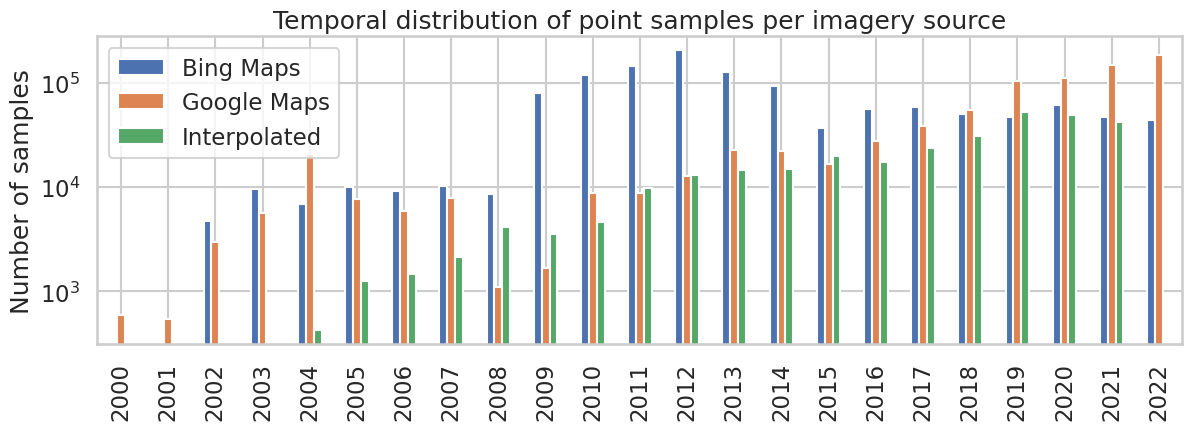

In [31]:
ax = samples[['year', 'imagery']].replace({"imagery": {'Google / Bing': 'Interpolated', 'Google': 'Google Maps', 'Bing': 'Bing Maps'}}).rename(columns={'imagery': 'Source'}).value_counts().unstack(fill_value=0).plot(kind='bar', xlabel='', ylabel='Number of samples', figsize=(14,4), logy=True,
title='Temporal distribution of point samples per imagery source')
ax.get_legend().set_title("")

# Export to PDF
#plt.savefig('point_samples_source.pdf', bbox_inches='tight')

What is the class proportion of all years?

<Axes: >

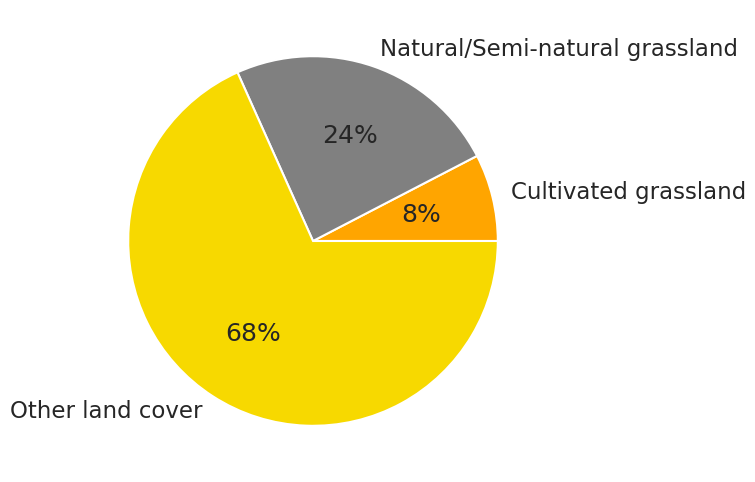

In [33]:
samples.groupby(['class_label']).count().plot(kind='pie', y='class', ylabel='', autopct='%1.0f%%', figsize=(6,6), colors = ['orange','gray','#f7d900'], legend=False)

In [ ]:
from pathlib import Path
import multiprocessing
import sys

from scipy.signal import argrelmin
from scipy.stats import uniform, randint

from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.experimental import enable_halving_search_cv 
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import log_loss
from sklearn.model_selection import GroupKFold, KFold
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import xgboost as xgb

import joblib

import numpy as np
import pandas as pd

### Columns selection

Before modeling, it is necessary to define the columns that will serve as: 
- Input feature/covariates 
- Spatial/blocking cross-validation group (see [GroupKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html#sklearn.model_selection.GroupKFold))

In [119]:
import numpy as np

# Input features/covariates
cov_idx = list(samples.columns).index('ml_type') + 1
covs = samples.columns[cov_idx:]

# Subset of relevant input features/covariates 
covs = covs[np.logical_or.reduce([
    covs.str.contains('accessibility'),
    covs.str.contains('blue'),
    covs.str.contains('bsf'),
    covs.str.contains('bsi'),
    covs.str.contains('clm'),
    covs.str.contains('dtm'),
    covs.str.contains('evi'),
    covs.str.contains('fapar'),
    covs.str.contains('green'),
    covs.str.contains('ndti'),
    covs.str.contains('ndvi'),
    covs.str.contains('ndwi'),
    covs.str.contains('nir'),
    covs.str.contains('nirv'),
    covs.str.contains('red'),
    covs.str.contains('road.distance_osm.highways.high.density'),
    covs.str.contains('road.distance_osm.highways.low.density'),
    covs.str.contains('swir1'),
    covs.str.contains('swir2'),
    covs.str.contains('thermal'),
    covs.str.contains('water.distance_glad.interanual.dynamic.classes'),
    covs.str.contains('wv_mcd19a2v061')
])]

# spatial/blocking CV group 
spatial_cv_column = 'ml_cv_group'

# Number of cv fold
cv_njobs, cv_folds = 5, 5

# Fixed seed for enabling reproducibility of the results
seed = 1989

print(f"Total number of input features/covariates: {len(covs)}")

Total number of input features/covariates: 197


### One-vs-one multi-class split

Aiming to enable modeling the grassland classes separately, which consists in training one model specialized in cultivated (binary classifier of cultivated grassland vs other land cover) and ) and another model specialized in natural/semi-natural grassland (binary classifier of natural/semi-natural grassland vs other land cover), we need to implement spit the labels (`class` column) by a [one-vs-one (ovo) multi-class strategy](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/).

Let's take a look the class labels

In [57]:
target_column = 'class'
samples[[target, 'class_label']].value_counts()

class  class_label                   
3      Other land cover                  1607555
2      Natural/Semi-natural grassland     566937
1      Cultivated grassland               179293
Name: count, dtype: int64

... and run the ovo split for cultivated grassland vs other land cover (`3 & 1`, other land cover as zero) and natural/semi-natural grassland vs other land cover (`3 & 2`, other land cover as zero):

In [58]:
def target_ovo(samples, target_column, c1_val, c2_val):
    remap_dict = {}
    remap_dict[c1_val] = 0
    remap_dict[c2_val] = 1
    col = f'{target_column}_{c1_val}{c2_val}'
    samples[col] = samples[target_column].map(remap_dict)
    return col

target_cols = []

for c1_val, c2_val in [ (3,1), (3,2)]:
    col_ovo = target_ovo(samples, target_column, c1_val, c2_val)
    target_cols.append(col_ovo)

print("OVO columns:", target_cols)

OVO columns: ['class_31', 'class_32']


In [59]:
samples

,sample_id,class,class_label,x,y,imagery,ref_date,year,ml_cv_group,ml_type,...,clm_lst_max.geom.temp_m_30m_s_m9,clm_lst_min.geom.temp_m_30m_s_m9,clm_lst_max.geom.temp_m_30m_s_m10,clm_lst_min.geom.temp_m_30m_s_m10,clm_lst_max.geom.temp_m_30m_s_m11,clm_lst_min.geom.temp_m_30m_s_m11,clm_lst_max.geom.temp_m_30m_s_m12,clm_lst_min.geom.temp_m_30m_s_m12,class_31,class_32
0,ee306b34a921c1ff345f6850683d9b43,3,Other land cover,0.453821,6.793882,Bing,2014-01-03,2014,gpw_8322,train,...,3436.0,2156.0,3347.0,2066.0,3253.0,1970.0,3184.0,1900.0,0.0,0.0
2,b36c15096000b1e1196d9353870fd4ab,3,Other land cover,0.456321,6.793882,Bing,2014-01-03,2014,gpw_8322,train,...,3437.0,2158.0,3348.0,2067.0,3254.0,1972.0,3186.0,1902.0,0.0,0.0
3,6030c825e5d3feee7efea315a9e8d5c6,3,Other land cover,0.456821,6.793882,Bing,2014-01-03,2014,gpw_8322,train,...,3437.0,2158.0,3348.0,2067.0,3254.0,1971.0,3185.0,1901.0,0.0,0.0
4,701a9eaa281fb0e612a72c754fde5a5c,3,Other land cover,0.457321,6.793882,Bing,2014-01-03,2014,gpw_8322,train,...,3436.0,2157.0,3347.0,2067.0,3253.0,1971.0,3185.0,1901.0,0.0,0.0
6,c9b53a070e273febef3ea4434029228f,3,Other land cover,0.458321,6.793882,Bing,2014-01-03,2014,gpw_8322,train,...,3435.0,2156.0,3347.0,2066.0,3253.0,1970.0,3184.0,1900.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981122,728134387c09acd3a3e4ebba5b0cb726,3,Other land cover,126.159990,8.939386,Google,2021-07-23,2021,gpw_9425,calibration,...,3506.0,2233.0,3389.0,2114.0,3266.0,1988.0,3176.0,1896.0,0.0,0.0
1981195,fd1203cd3654bd83ee86158dd7c27446,3,Other land cover,126.163994,8.937387,Google,2021-07-23,2021,gpw_9425,calibration,...,3512.0,2238.0,3395.0,2120.0,3271.0,1994.0,3181.0,1902.0,0.0,0.0
1980973,f5d89cd29bcdbc4f8dba5274320c2d9b,3,Other land cover,126.159990,8.943886,Google,2021-07-23,2021,gpw_9425,calibration,...,3526.0,2253.0,3409.0,2134.0,3286.0,2008.0,3196.0,1916.0,0.0,0.0
1981192,d363b691dcd1c5e170fa55ec79733028,3,Other land cover,126.161490,8.937387,Google,2021-07-23,2021,gpw_9425,calibration,...,3511.0,2238.0,3395.0,2119.0,3271.0,1994.0,3181.0,1902.0,0.0,0.0


### NA checking

Let's make sure that there now `NA`s (represented as `np.nan` in [numpy](https://numpy.org/)) in the input features/covariates

In [65]:
any_nan_samples = np.sum(np.isnan(samples[covs].to_numpy()).astype('int'), axis=0)
cols_to_remove = []

for th in [1, 0.5, 0.2, 0.1, 0.05]:
    print(f"Checking columns with {th*100}% of nan values")
    for c,s in zip(covs, any_nan_samples):
        if s > (samples.shape[0] * th):
            print(f' - {s} => {c}')
            cols_to_remove += [c]

cols_to_remove = set(cols_to_remove)
print(f"Removing {len(cols_to_remove)} columns (>= {th*100}% of nan values)")

Checking columns with 100% of nan values
Checking columns with 50.0% of nan values
Checking columns with 20.0% of nan values
Checking columns with 10.0% of nan values
Checking columns with 5.0% of nan values
Removing 0 columns (>= 5.0% of nan values)


neither in the sample rows:

In [68]:
nan_samples = samples[np.any(np.isnan(samples[covs].to_numpy()).astype('int'), axis=1)].index
print(f"Removing {len(nan_samples)} samples with at least one column with nan")
samples = samples.drop(nan_samples)

Removing 0 samples with at least one column with nan


## ML modeling

For the ML modeling the samples need to be split in calibration and training set, in our case `10%` and `90%`, respectively. The calibration samples will be used for **feature selection** and **hyper-parameter tuning**.

Let's use the column `ml_type` for spit the samples:

In [71]:
data_calib = samples[samples['ml_type'] == 'calibration']
data_train = samples[samples['ml_type'] == 'train']

print(f"Calibration samples: {data_calib.shape}")
print(f"Training samples: {data_train.shape}")

Calibration samples: (231428, 257)
Training samples: (2122357, 257)


### Feature selection

The first step of our ML modeling is the feature selection based on [Recursive Feature Elimination (RFE)](https://doi.org/10.3390/rs12111842) and implemented in sckit-learn by [RFECV](https://scikit-learn.org/dev/modules/generated/sklearn.feature_selection.RFECV.html) and [RFE](https://scikit-learn.org/dev/modules/generated/sklearn.feature_selection.RFE.html) classes. 

Let's considering [RandomForest](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (60 trees and default hyper-parameters) for running RFE and find the best **75 features** to classify each grassland class separately. It's a good practice to run RFE cross-valitation  (RFECV) for understanding what is the impact in the model accuracy of dropping the number features. We selected [log_loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) (suitable for probability assessment) as scoring metric of our RFECV, which was repeated 5 times and averaged to derive the final scoring values.

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold, KFold
from sklearn.feature_selection import RFECV, RFE
from scipy.signal import argrelmin
import multiprocessing

def run_feature_selection(data, covs, target_column, seed, weights=None, spatial_cv_column = None,
                          subsample_pct = 0.1, n_rep = 5, n_cv = 5, ntrees = 60, local_min_pos = 0, order=2):

    # Feature selection using the full set of calibration samples
    data_sub = data
    
    # Feature selection using a subset of calibration samples
    # data_sub = data#.sample(int(data.shape[0] * subsample_pct), random_state=seed)
    
    rfecv_step = int(len(covs) * 0.05)
    rfe_step = int(rfecv_step / 2)
    
    cv, groups = KFold(n_cv), None
    if spatial_cv_column is not None:
        cv, groups = GroupKFold(n_cv), data[spatial_cv_column]
    
    ncpu = multiprocessing.cpu_count()
    if ntrees < ncpu:
        ncpu = ntrees

    ttprint(f"Finding n_features_to_select using RFECV (repetitions={n_rep} step={rfecv_step}, n_samples={data.shape[0]})")
    
    grid_scores = []
    for i in range(0,n_rep):
        ttprint(f"Repetition {i}")
        rfecv = RFECV(estimator=RandomForestClassifier(ntrees, n_jobs=ncpu, random_state=i), cv=cv, step=rfecv_step, 
                      min_features_to_select=10, n_jobs=n_cv, scoring='neg_log_loss')
        rfecv.fit(data[covs], data[target_column], groups=groups)
        grid_scores += [rfecv.cv_results_['mean_test_score']]

    rfecv_mean_score = np.mean(np.stack(grid_scores, axis=0), axis=0)
    grid_scores_std = np.std(np.stack(grid_scores, axis=0), axis=0)
    
    rfecv_n_features_arr = list(range(rfecv.min_features_to_select, len(covs)+rfecv.step, rfecv.step))
    
    # Select automatically n_features_to_select according to the local minimum
    #local_min_arr = argrelmin(rfecv_mean_score, order=order)[0]
    #local_min = local_min_arr[0]
    #if len(local_min_arr) > 1:
    #    local_min = local_min_arr[local_min_pos]
    
    #n_features_to_select = rfecv_n_features_arr[local_min]
    
    # Fixed n_features_to_select considering 38% of the total number of features
    n_features_to_select = 75
    
    ttprint(f"Finding best features using RFE (n_features_to_select = {n_features_to_select})")
    
    rfe = RFE(estimator=RandomForestClassifier(ntrees, n_jobs=ncpu, random_state=n_rep), step=rfe_step, n_features_to_select=n_features_to_select, verbose=1)
    rfe.fit(data[covs], data[target_column])

    result = covs[rfe.support_]
    
    return result, rfecv_n_features_arr, rfecv_mean_score, grid_scores_std

Let's run the feature selection and save the results using [joblib](https://joblib.readthedocs.io/en/stable/). This might take some hours, so it is time for a coffee :)

In [72]:
from pathlib import Path
import joblib

for tc in target_cols:
    fn_rfcv = f'rfecv_{tc}.lz4' 
    if not Path(fn_rfcv).exists():
        ttprint(f"Finding best features for {tc}")
        data_calib_mask = np.logical_not(np.isnan(data_calib[tc]))
        covs_rfe, rfecv_n_features_arr, rfecv_mean_score, rfecv_std_score = run_feature_selection(
            data_calib[data_calib_mask], covs, tc, seed, weights=None, spatial_cv_column, local_min_pos=0)
        joblib.dump({
            'covs_rfe':covs_rfe, 
            'rfecv_n_features_arr': rfecv_n_features_arr, 
            'rfecv_mean_score': rfecv_mean_score,
            'rfecv_std_score': rfecv_std_score
        }, fn_rfcv, compress='lz4')
    else:
        print(f"{fn_rfcv} already exists")
    

rfecv_class_31.lz4 already exists
rfecv_class_32.lz4 already exists


It is time to visualize the RFECV result:

Number of features selected: 75


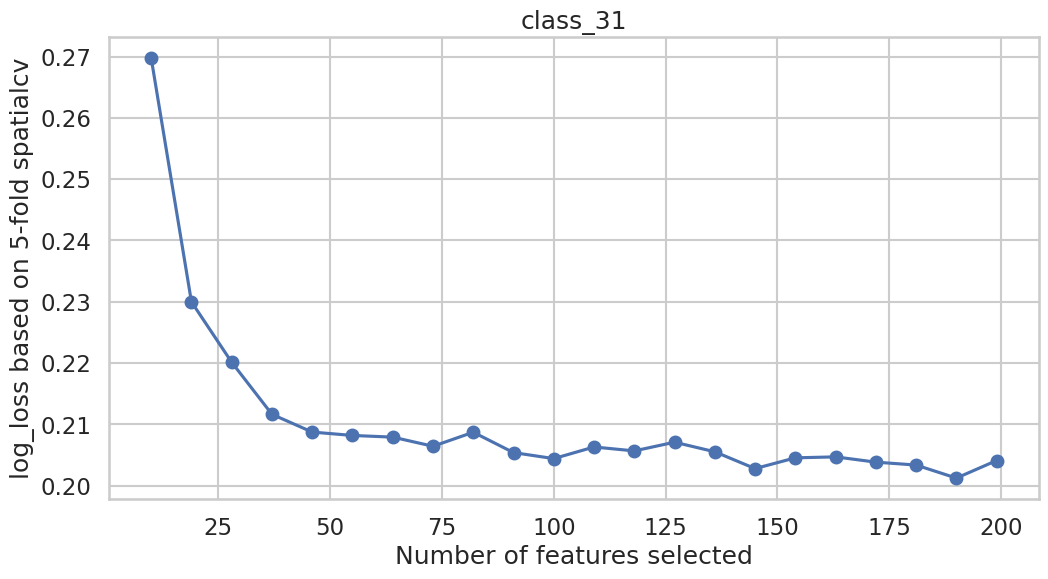

Number of features selected: 75


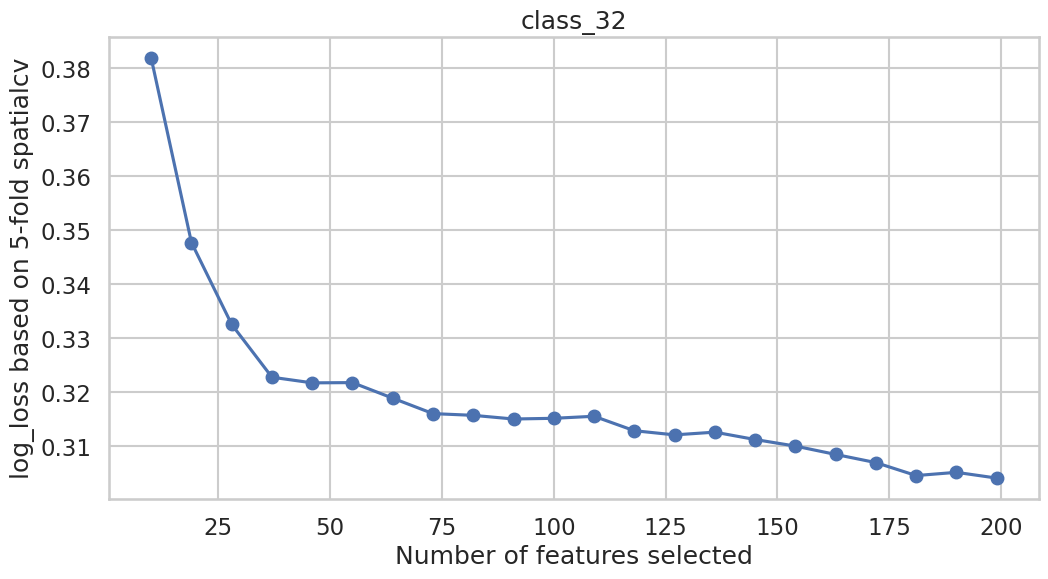

In [73]:
import matplotlib.pyplot as plt
import joblib
import sys

def plot_rfecv(fn_rfcv, tc):
    sys._getframe(1).f_locals.update(joblib.load(fn_rfcv))
    print(f"Number of features selected: {len(covs_rfe)}")

    plt.figure(figsize=(12,6))
    plt.xlabel("Number of features selected")
    plt.ylabel("log_loss based on 5-fold spatialcv")
    plt.plot(rfecv_n_features_arr, rfecv_mean_score * -1, linestyle='-', marker='o')
    plt.title(tc)
    plt.show()
    
    return covs_rfe

covs_rfe_arr = {}

for tc in target_cols:
    covs_rfe_arr[tc] = plot_rfecv(f'rfecv_{tc}.lz4', tc)

... and save the best features selected by RFE.

In [75]:
covs_ref_all = []
for covs in covs_rfe_arr.values():
    covs_ref_all += list(covs)

covs_ref_all = set(covs_ref_all)
covs_ref_all = sorted(covs_ref_all)
features = pd.DataFrame({'name':covs_ref_all }).set_index('name')

for tc in covs_rfe_arr.keys():
    features.loc[covs_rfe_arr[tc], tc] = True

features = features.fillna(False)
features['frequency'] = np.sum(features.to_numpy().astype('int'), axis=1)
features = features.reset_index()
features.to_csv('rfe_best_features.csv')
features

,name,class_31,class_32,frequency
0,bsi_glad.SeasConv.ard2_m_30m_s_0101_0228_go_ep...,False,True,1
1,bsi_glad.SeasConv.ard2_m_30m_s_0301_0430_go_ep...,False,True,1
2,bsi_glad.SeasConv.ard2_m_30m_s_0701_0831_go_ep...,True,False,1
3,bsi_glad.SeasConv.ard2_m_30m_s_1101_1231_go_ep...,False,True,1
4,clm_lst_max.geom.temp_m_30m_s_m1,True,False,1
...,...,...,...,...
98,wv_mcd19a2v061.seasconv.m.m10_p50_1km_s_200001...,True,True,2
99,wv_mcd19a2v061.seasconv.m.m10_sd_1km_s_2000010...,True,True,2
100,wv_mcd19a2v061.seasconv.m.m11_p50_1km_s_200001...,True,True,2
101,wv_mcd19a2v061.seasconv.m.m12_p50_1km_s_200001...,True,True,2


Note that almost half of features are important for classifying both grassland classes (cultivated and natural/semi-natural): 

In [83]:
print(f"Proportion of features in both models: {len(features[features['frequency'] == 2]) / features.shape[0]:.0%}")

Proportion of features in both models: 46%


### Hyper-parameter tuning, spatial-CV and final models

The next steps of our ML modeling are:
1. **Hyper-parameter tuning** based on [Successive Halving](https://doi.org/10.1109/SDS.2019.00-11) and the _calibration samples_, which is implemented by [HalvingRandomSearchCV](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html) class
2. **Spatial/blocking CV** based on the _training samples_ and implemented by [cross_val_predict](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.cross_val_predict.html) function and [GroupKFold](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GroupKFold.html) class,
3. **Train the final model** using all samples (training and validation combined).

Aiming to compare multiple ML algorithm, all the modeling steps are executed for:
- Random Forest ([sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html))
- Gradient boosting trees ([xgboost.XGBClassifier](https://xgboost.readthedocs.io/en/stable/parameter.html))
- Artificial Neural Network ([sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html))

The **HalvingRandomSearchCV** use a pre-defined distribution/list of possibilities for randomly select values for each hyper-parameter.

Let's defined the distribution/list of values for Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, randint

estimator_rf = RandomForestClassifier(n_jobs=-1, n_estimators=60)

param_distributions = {
    "criterion": [ "gini", "entropy"],
    "max_depth": randint(5, 100),
    "max_features": uniform(loc=0, scale=1),
    "min_samples_split": randint(2, 40),
    "min_samples_leaf": randint(1, 10),
    "class_weight": [None, "balanced", "balanced_subsample" ]
}

...Gradient boosting trees

In [86]:
import xgboost as xgb

estimator_xb = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic', booster='gbtree', 
    eval_metric='mlogloss', random_state=seed)

param_distributions_xb = {
    "tree_method": ['hist', 'approx'],
    "grow_policy": ['depthwise', 'lossguide'],
    "alpha": uniform(loc=0, scale=2),
    "reg_alpha": uniform(loc=0, scale=0.2),
    "eta": uniform(loc=0, scale=2),
    "reg_lambda": uniform(loc=0, scale=0.2),
    "gamma": uniform(loc=0, scale=2),
    "subsample": uniform(loc=0.5, scale=0.5),
    "learning_rate": uniform(loc=0, scale=0.2),
    "colsample_bytree": uniform(loc=0, scale=1),
    "colsample_bylevel": uniform(loc=0, scale=1),
    "colsample_bynode": uniform(loc=0, scale=1),
    "max_depth": randint(10, 100),
    "n_estimators": randint(10, 60)
}

...Artificial Neural Network: 

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

net = MLPClassifier(
    max_iter=100, 
    random_state=1989, 
    early_stopping=True, 
    n_iter_no_change=5,
    verbose=False
)

estimator_ann = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', net),
])

param_distributions_ann = {
    "estimator__hidden_layer_sizes": [ (i,j) for i in range(4,8) for j in range(32,256,32) ],
    "estimator__batch_size": randint(32, 256),
    "estimator__learning_rate_init": uniform(loc=0.0001, scale=0.001),
    "estimator__activation": ['logistic', 'relu'],
    "estimator__alpha": uniform(loc=0.0001, scale=0.00005),
    "estimator__learning_rate": ['constant', 'adaptive'],
    "estimator__beta_1": uniform(loc=0.65, scale=0.30),
    "estimator__beta_2": uniform(loc=0.65, scale=0.30),
    "estimator__epsilon": uniform(loc=1e-8, scale=1e-9),
    "estimator__solver": ['adam']
}


Now it is time to run the next modeling steps:

In [118]:
samples.columns

Index(['sample_id', 'class', 'class_label', 'x', 'y', 'imagery', 'ref_date',
       'year', 'ml_cv_group', 'ml_type',
       ...
       'clm_lst_max.geom.temp_m_30m_s_m9', 'clm_lst_min.geom.temp_m_30m_s_m9',
       'clm_lst_max.geom.temp_m_30m_s_m10',
       'clm_lst_min.geom.temp_m_30m_s_m10',
       'clm_lst_max.geom.temp_m_30m_s_m11',
       'clm_lst_min.geom.temp_m_30m_s_m11',
       'clm_lst_max.geom.temp_m_30m_s_m12',
       'clm_lst_min.geom.temp_m_30m_s_m12', 'class_31', 'class_32'],
      dtype='object', length=257)

In [139]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import GroupKFold, KFold
from sklearn.model_selection import cross_val_predict

rfe_covs = features['name']

for tc in target_cols:
  fn_model = f'model_{tc}.lz4' 
  print(f"Modeling {tc}")
  
  tc_data_calib = data_calib[np.logical_not(np.isnan(data_calib[tc]))].sample(1000)
  tc_data_train = data_train[np.logical_not(np.isnan(data_train[tc]))].sample(1000)
  tc_data = samples[np.logical_not(np.isnan(samples[tc]))].sample(1000)

  max_resources = len(tc_data_calib)
  hyperpar_rf = HalvingRandomSearchCV(
    estimator = estimator_rf,
    scoring = 'neg_log_loss',
    param_distributions = param_distributions,
    factor = 2,
    verbose = 1,
    min_resources = 500,
    max_resources = max_resources,
    cv = GroupKFold(cv_folds),
    random_state=seed,
    refit = False,
    n_jobs = cv_folds
  )
    
  hyperpar_xb = HalvingRandomSearchCV(
    estimator = estimator_xb,
    scoring = 'neg_log_loss',
    param_distributions = param_distributions_xb,
    factor = 2,
    verbose = 1,
    min_resources = 500,
    max_resources = max_resources,
    cv = GroupKFold(cv_folds), 
    random_state=seed
  )

  hyperpar_ann = HalvingRandomSearchCV(
    estimator = estimator_ann,
    scoring = 'neg_log_loss',
    param_distributions = param_distributions_ann,
    factor = 2,
    verbose = 1,
    min_resources = 500,
    max_resources = max_resources,
    cv = GroupKFold(cv_folds), 
    random_state=seed
  )
    
  print(f"Model {tc} - Finding best hyper-paramenters ({tc_data_calib[rfe_covs].shape})")
  hyperpar_rf.fit(tc_data_calib[rfe_covs], tc_data_calib[tc], groups=tc_data_calib[spatial_cv_column])
  best_params_rf = hyperpar_rf.best_params_

  hyperpar_xb.fit(tc_data_calib[rfe_covs], tc_data_calib[tc], groups=tc_data_calib[spatial_cv_column])
  best_params_xb = hyperpar_xb.best_params_

  hyperpar_ann.fit(tc_data_calib[rfe_covs], tc_data_calib[tc], groups=tc_data_calib[spatial_cv_column])
  best_params_ann = hyperpar_ann.best_params_

  print(f"Model {tc} - Best RF: {hyperpar_rf.best_score_:.5f} using {best_params_rf}")
  print(f"Model {tc} - Best XB: {hyperpar_xb.best_score_:.5f} using {best_params_xb}")
  print(f"Model {tc} - Best ANN: {hyperpar_ann.best_score_:.5f} using {best_params_ann}")
  estimator_rf = RandomForestClassifier(n_jobs=-1, n_estimators=60)
  estimator_rf.set_params(**best_params_rf)
  
  estimator_xb = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic', booster='gbtree', 
     eval_metric='mlogloss', random_state=seed)
  estimator_xb.set_params(**best_params_xb)

  estimator_ann = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', net),
  ])
  estimator_ann.set_params(**best_params_ann)
    
  print(f"Model {tc} - Cross-validation ({tc_data_train[rfe_covs].shape})")
  cv_result_rf = cross_val_predict(estimator_rf, tc_data_train[rfe_covs], tc_data_train[tc], method='predict_proba', n_jobs=5, \
                        cv=GroupKFold(cv_folds), groups=tc_data_train[spatial_cv_column], verbose=True)
  cv_result_xb = cross_val_predict(estimator_xb, tc_data_train[rfe_covs], tc_data_train[tc], method='predict_proba', n_jobs=5, \
                        cv=GroupKFold(cv_folds), groups=tc_data_train[spatial_cv_column], verbose=True)
  cv_result_ann = cross_val_predict(estimator_ann, tc_data_train[rfe_covs], tc_data_train[tc], method='predict_proba', n_jobs=5, \
                        cv=GroupKFold(cv_folds), groups=tc_data_train[spatial_cv_column], verbose=True)
  
  print(f"Model {tc} - Fitting final model ({tc_data_train[rfe_covs].shape})")
  estimator_rf.fit(tc_data[rfe_covs], tc_data[tc])
  estimator_xb.fit(tc_data[rfe_covs], tc_data[tc])
  estimator_ann.fit(tc_data[rfe_covs], tc_data[tc])

  joblib.dump({
        'best_params_rf':best_params_rf, 
        'cv_result_rf': pd.DataFrame({
            'predict_proba': cv_result_rf[:,1],
            'expected': tc_data_train[tc].to_numpy(),
            'cv_group': tc_data_train[spatial_cv_column].to_numpy()
         }), 
        'model_rf': estimator_rf,
        'best_params_xb':best_params_xb, 
        'cv_result_xb': pd.DataFrame({
            'predict_proba': cv_result_xb[:,1],
            'expected': tc_data_train[tc].to_numpy(),
            'cv_group': tc_data_train[spatial_cv_column].to_numpy()
         }), 
        'model_xb': estimator_xb,
        'best_params_ann':best_params_ann, 
        'cv_result_ann': pd.DataFrame({
            'predict_proba': cv_result_ann[:,1],
            'expected': tc_data_train[tc].to_numpy(),
            'cv_group': tc_data_train[spatial_cv_column].to_numpy()
         }),  
        'model_ann': estimator_ann
  }, fn_model, compress='lz4')

Modeling class_31
Model class_31 - Finding best hyper-paramenters ((1000, 103))
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 1000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 2
n_resources: 500
Fitting 5 folds for each of 2 candidates, totalling 10 fits
----------
iter: 1
n_candidates: 1
n_resources: 1000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 1000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 2
n_resources: 500
Fitting 5 folds for each of 2 candidates, totalling 10 fits
----------
iter: 1
n_candidates: 1
n_resources: 1000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 1000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


Model class_31 - Fitting final model ((1000, 103))
Modeling class_32
Model class_32 - Finding best hyper-paramenters ((1000, 103))
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 1000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 2
n_resources: 500
Fitting 5 folds for each of 2 candidates, totalling 10 fits
----------
iter: 1
n_candidates: 1
n_resources: 1000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 1000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 2
n_resources: 500
Fitting 5 folds for each of 2 candidates, totalling 10 fits
----------
iter: 1
n_candidates: 1
n_resources: 1000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 1000
aggressive_eliminati

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


Model class_32 - Fitting final model ((1000, 103))


In [ ]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import cross_val_predict

rfe_covs = features['name']

for tc in target_cols:
  fn_model = f'model_{tc}.lz4' 
  ttprint(f"Finding best features for {tc}")
  
  tc_data_calib = data_calib[np.logical_not(np.isnan(data_calib[tc]))]
  tc_data_train = data_train[np.logical_not(np.isnan(data_train[tc]))]
  tc_data = data[np.logical_not(np.isnan(data[tc]))]

  max_resources = len(tc_data_calib)
  hyperpar_rf = HalvingRandomSearchCV(
    estimator = estimator_rf,
    scoring = 'neg_log_loss',
    param_distributions = param_distributions,
    factor = 2,
    verbose = 1,
    min_resources = 500,
    max_resources = max_resources,
    cv = GroupKFold(cv_folds),
    random_state=seed,
    refit = False,
    n_jobs = cv_folds
  )
    
  hyperpar_xb = HalvingRandomSearchCV(
    estimator = estimator_xb,
    scoring = 'neg_log_loss',
    param_distributions = param_distributions_xb,
    factor = 2,
    verbose = 1,
    min_resources = 500,
    max_resources = max_resources,
    cv = GroupKFold(cv_folds), 
    random_state=seed
  )

  hyperpar_ann = HalvingRandomSearchCV(
    estimator = estimator_ann,
    scoring = 'neg_log_loss',
    param_distributions = param_distributions_ann,
    factor = 2,
    verbose = 1,
    min_resources = 500,
    max_resources = max_resources,
    cv = GroupKFold(cv_folds), 
    random_state=seed
  )
    
  ttprint(f"Model {tc} - Finding best hyper-paramenters ({tc_data_calib[rfe_covs].shape})")
  hyperpar_rf.fit(tc_data_calib[rfe_covs], tc_data_calib[tc], groups=tc_data_calib[spatial_cv_column])
  best_params_rf = hyperpar_rf.best_params_

  hyperpar_xb.fit(tc_data_calib[rfe_covs], tc_data_calib[tc], groups=tc_data_calib[spatial_cv_column])
  best_params_xb = hyperpar_xb.best_params_

  hyperpar_ann.fit(tc_data_calib[rfe_covs], tc_data_calib[tc], groups=tc_data_calib[spatial_cv_column])
  best_params_ann = hyperpar_ann.best_params_

  ttprint(f"Model {tc} - Best RF: {hyperpar_rf.best_score_:.5f} using {best_params_rf}")
  ttprint(f"Model {tc} - Best XB: {hyperpar_xb.best_score_:.5f} using {best_params_xb}")
  ttprint(f"Model {tc} - Best ANN: {hyperpar_ann.best_score_:.5f} using {best_params_ann}")
  estimator_rf = RandomForestClassifier(n_jobs=-1, n_estimators=60)
  estimator_rf.set_params(**best_params_rf)
  
  estimator_xb = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic', booster='gbtree', 
     eval_metric='mlogloss', random_state=seed)
  estimator_xb.set_params(**best_params_xb)

  estimator_ann = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', net),
  ])
  estimator_ann.set_params(**best_params_ann)
    
  ttprint(f"Model {tc} - Cross-validation ({tc_data_train[rfe_covs].shape})")
  cv_result_rf = cross_val_predict(estimator_rf, tc_data_train[rfe_covs], tc_data_train[tc], method='predict_proba', n_jobs=5, \
                        cv=GroupKFold(cv_folds), groups=tc_data_train[spatial_cv_column], verbose=True)
  cv_result_xb = cross_val_predict(estimator_xb, tc_data_train[rfe_covs], tc_data_train[tc], method='predict_proba', n_jobs=5, \
                        cv=GroupKFold(cv_folds), groups=tc_data_train[spatial_cv_column], verbose=True)
  cv_result_ann = cross_val_predict(estimator_ann, tc_data_train[rfe_covs], tc_data_train[tc], method='predict_proba', n_jobs=5, \
                        cv=GroupKFold(cv_folds), groups=tc_data_train[spatial_cv_column], verbose=True)
  
  ttprint(f"Model {tc} - Fitting final model ({tc_data_train[rfe_covs].shape})")
  estimator_rf.fit(tc_data[rfe_covs], tc_data[tc])
  estimator_xb.fit(tc_data[rfe_covs], tc_data[tc])
  estimator_ann.fit(tc_data[rfe_covs], tc_data[tc])

  joblib.dump({
        'best_params_rf':best_params_rf, 
        'cv_result_rf': cv_result_rf, 
        'model_rf': estimator_rf,
        'best_params_xb':best_params_xb, 
        'cv_result_xb': cv_result_xb, 
        'model_xb': estimator_xb,
        'best_params_ann':best_params_ann, 
        'cv_result_ann': cv_result_ann, 
        'model_ann': estimator_ann
  }, fn_model, compress='lz4')

### Variable importance

Let's plot the most important feature/covariates of the Random Forest models:

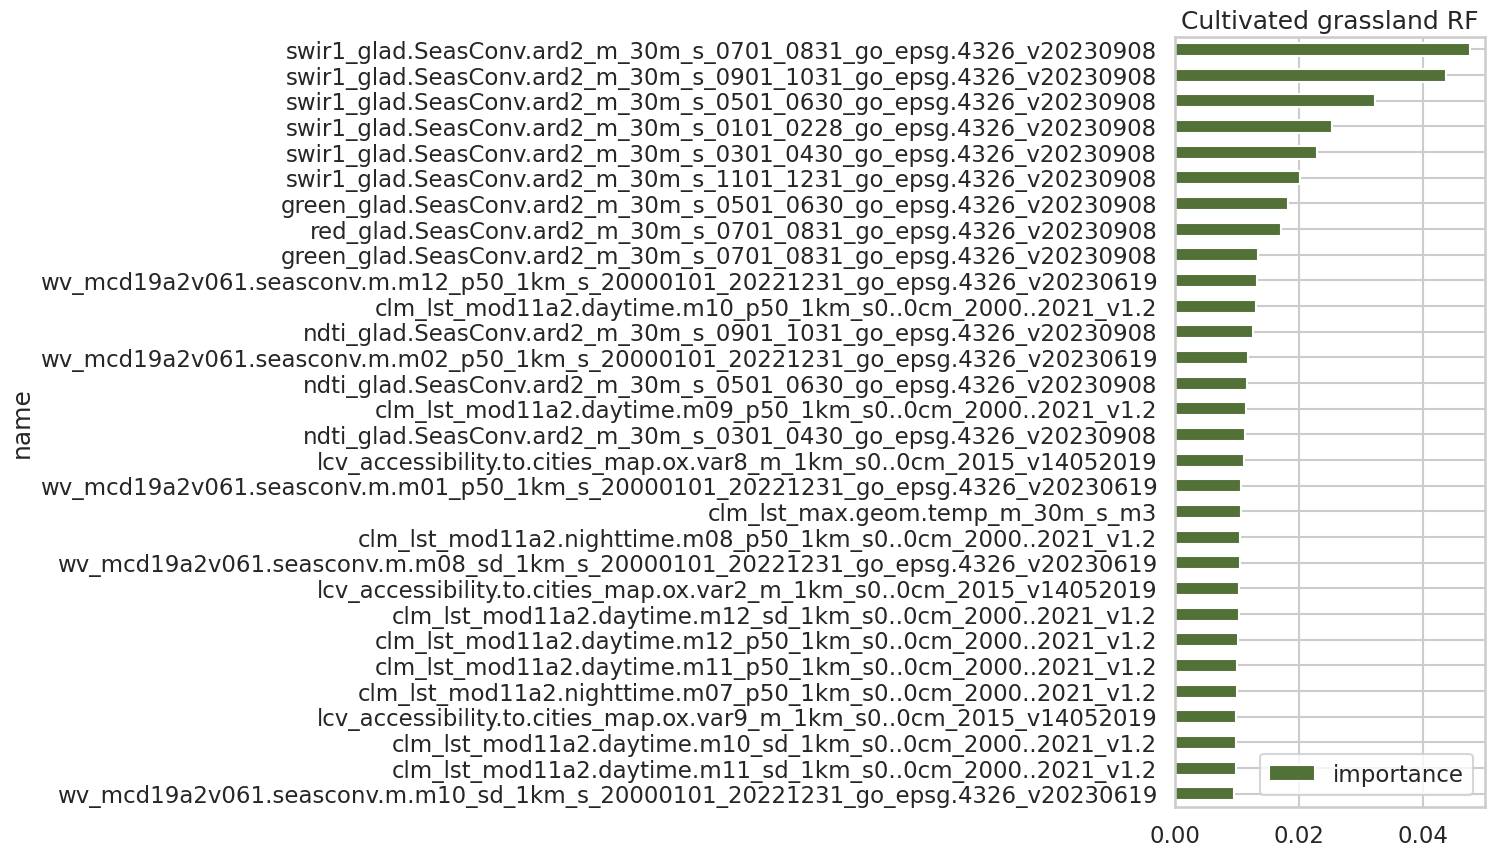

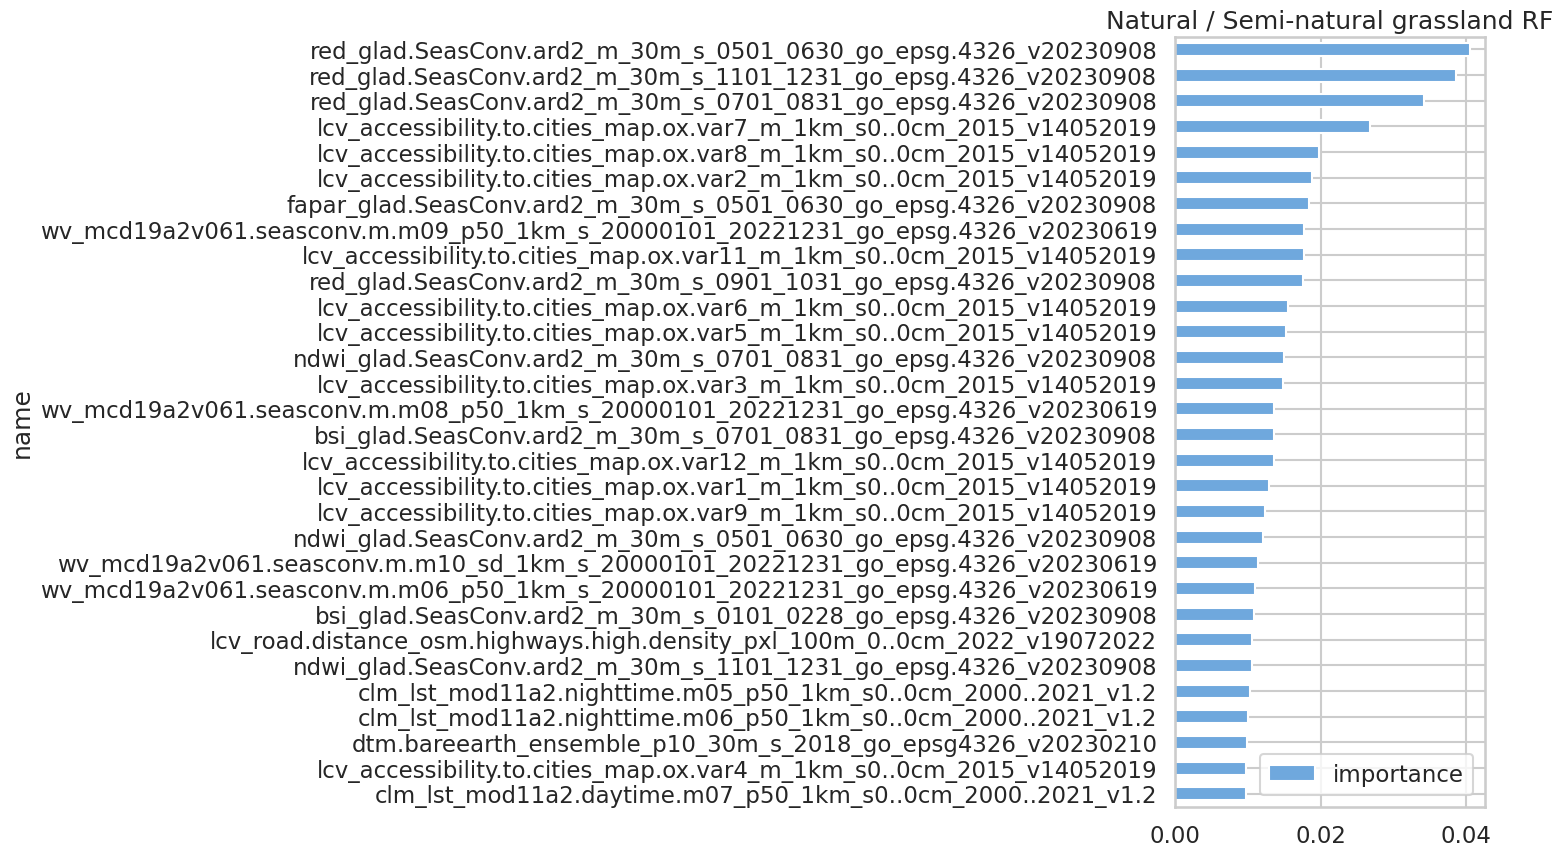

In [96]:
def plot_var_imp(feature_cols, estimator, title, top_n = 20, figsize=(4,10), color = 'blue'):
    var_imp = pd.DataFrame({'name':feature_cols, 'importance': estimator.feature_importances_})
    var_imp.index = var_imp['name']
    var_imp.sort_values('importance', ascending=False)[0:top_n].sort_values('importance').plot(kind = 'barh', figsize=figsize, title = title, color = color)

for tc in target_cols:
    m = joblib.load(f'model_{tc}.lz4')['model_rf']
    label = "Cultivated grassland RF"
    color = '#527137'
    if tc == 'class_32':
        label = 'Natural / Semi-natural grassland RF'
        color = '#6fa8dd'
    plot_var_imp(m.feature_names_in_, m, label, 30, color=color)

... and Gradient boosting trees:

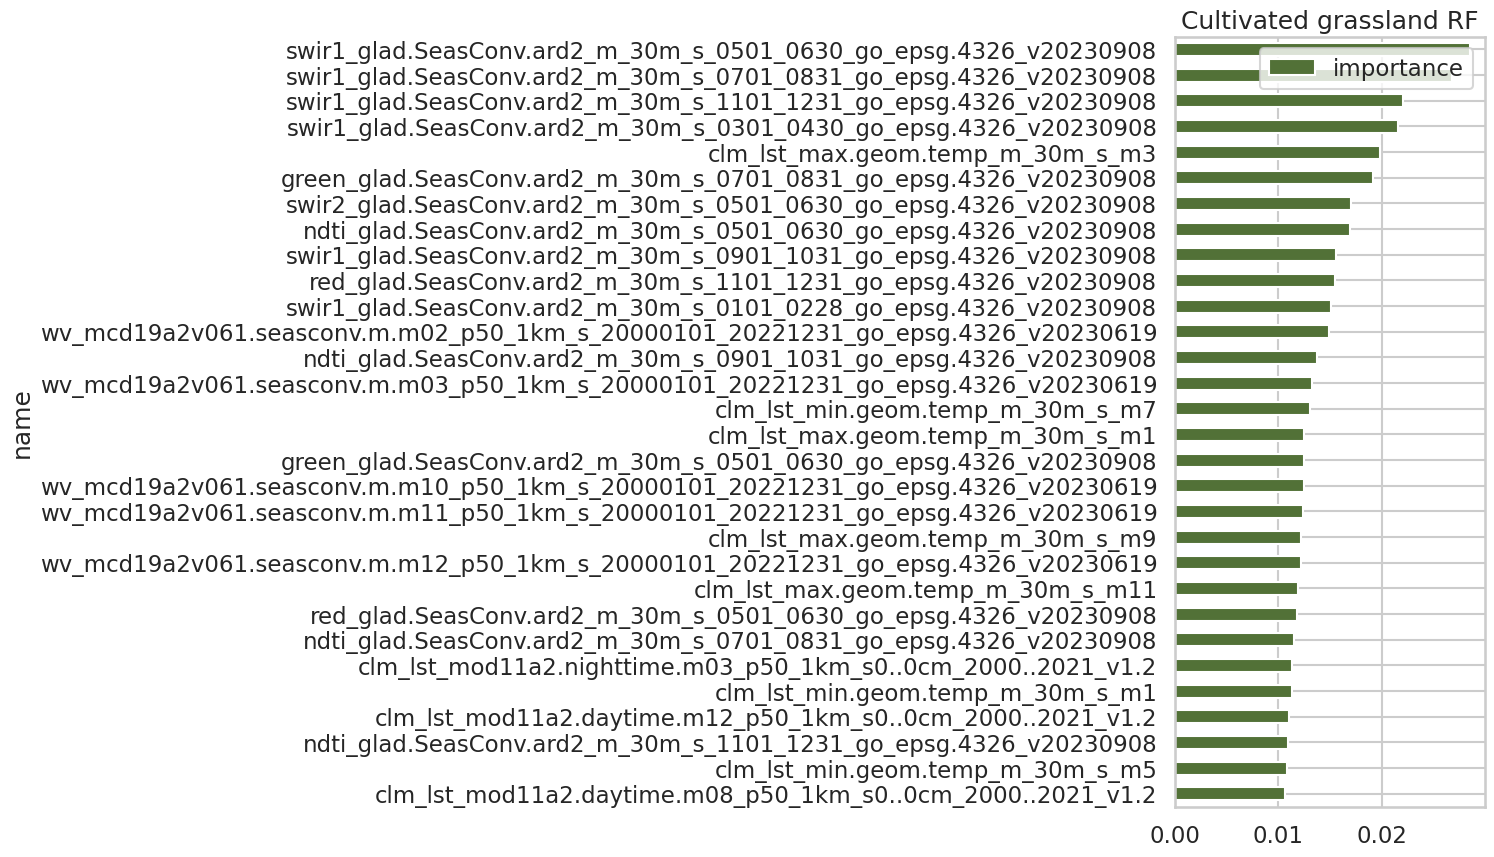

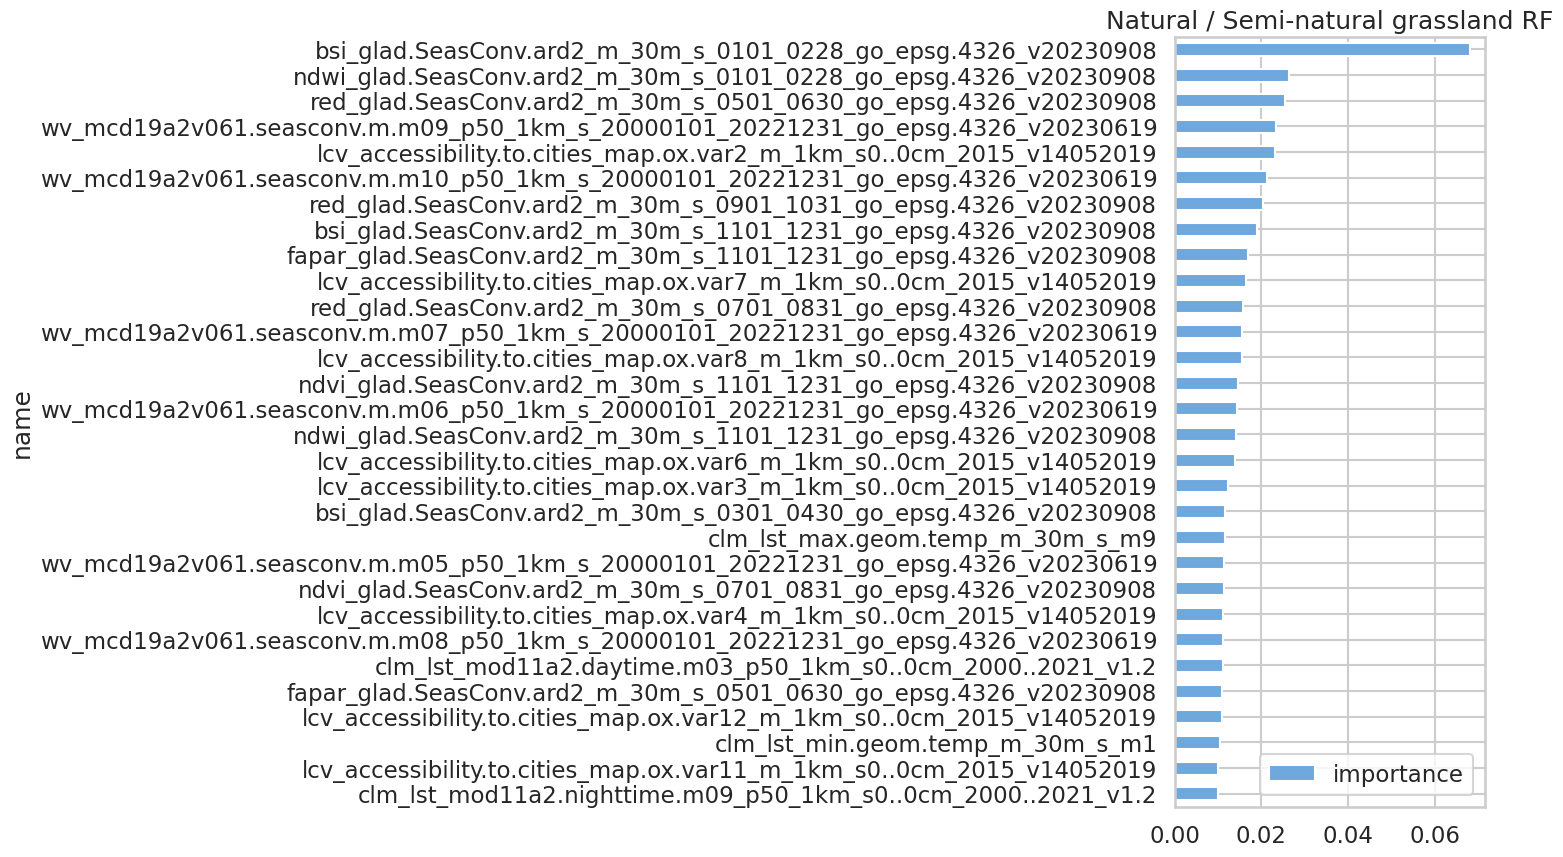

In [97]:
for tc in target_cols:
    m = joblib.load(f'model_{tc}.lz4')['model_xb']
    label = "Cultivated grassland RF"
    color = '#527137'
    if tc == 'class_32':
        label = 'Natural / Semi-natural grassland RF'
        color = '#6fa8dd'
    plot_var_imp(m.feature_names_in_, m, label, 30, color=color)

### Spatial CV

Let's consider the spatial CV results for estimate `r2_log_loss` (`dumb_loss`):

In [ ]:
import pandas as pd
from sklearn.metrics import log_loss, brier_score_loss
import joblib

def dumb_loss(y_test, y_score):
    y_score_dumb = np.zeros(y_score.shape) * 0.5
    mask = (y_test == 1)
    prop = np.sum((y_test == 1).astype('int')) / y_test.shape[0]
    y_score_dumb[:] = (1 - prop)
    y_score_dumb[mask] = prop
    
    rloss = log_loss(y_test, y_score)
    dloss = log_loss(y_test, y_score_dumb)
    r2_loss = 1 - rloss / dloss
    
    return r2_loss
    
stats = []
    
for tc in target_cols:
    m = joblib.load(f'model_{tc}.lz4')
    
    label, color = 'Cultivated grassland', '#f7d900'
    if tc == 'class_32':
        label, color = 'Natural / Semi-natural grassland', '#ffa500'
    
    mask = np.logical_not(np.isnan(data_train[tc]))
    
    y_test = m['cv_result_rf']['expected']
    y_score_rf = m['cv_result_rf']['predict_proba']
    y_score_xb = m['cv_result_xb']['predict_proba']
    y_score_ann = m['cv_result_ann']['predict_proba']
    
    stats.append({ 'r2_loss': dumb_loss(y_test, y_score_rf), 'class': tc, 'label': label, 'model': 'Random Forest'})
    stats.append({ 'r2_loss': dumb_loss(y_test, y_score_xb), 'class': tc, 'label': label, 'model': 'Gradient descending trees'})
    stats.append({ 'r2_loss': dumb_loss(y_test, y_score_ann), 'class': tc, 'label': label, 'model': 'Artificial Neural Networks'})
    
stats = pd.DataFrame(stats)
stats

...and for estimating precision-recall curves to find the probability thresholds able to balance **precision (user’s acc.)** and **recall (producer’s acc.)**:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
import joblib

for tc in target_cols:
    cv_result = joblib.load(f'model_{tc}.lz4')['cv_result_rf']
    print(f' Random Forest({tc} (Random Forest)')
    
    y_test = cv_result['expected']
    y_score = cv_result['predict_proba']
        
    prec, recall, th = precision_recall_curve(y_test, y_score)
    nonzero_mask = np.logical_and((prec != 0.0), (recall != 0.0))
    optimal_idx = np.argmax(1 - np.abs(prec[nonzero_mask] - recall[nonzero_mask]))
    th_opt = th[optimal_idx]
    
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    
    print(f"Optimal threshold: {th_opt}")
    print(classification_report(y_test, y_score > th_opt))
    print(f"Threshold 0.5")
    print(classification_report(y_test, y_score > 0.5))

## Model compilation

Once the final RF models are trained, let's compile them for native C binary using [TL2cgen](https://tl2cgen.readthedocs.io/en/latest/), which will speed-up the prediction time:

In [155]:
target_cols

from pathlib import Path
from tl2cgen.contrib.util import _libext
import numpy as np
import os
import pathlib
import tl2cgen
import treelite

def compile_rf(fn_model, outdir, shape):
    
    outdir = Path(outdir)
    outdir.mkdir(parents=False, exist_ok=True)
    print(f"Compiling {fn_model} into {outdir}")
    prefix = Path(fn_model).stem
    
    dtrain = tl2cgen.DMatrix(np.empty(shape), dtype="float32")
    model_rf = joblib.load(fn_model)['model_rf']
    model = treelite.sklearn.import_model(model_rf)
    annotation_path = outdir.joinpath(f"{prefix}_rf.json")
    tl2cgen.annotate_branch(model, dtrain, path=annotation_path, verbose=True)

    libpath = outdir.joinpath(f"{prefix}_rf" + _libext())
    tl2cgen.export_lib(
      model,
      toolchain= '/opt/intel/oneapi/compiler/2024.0/bin/icx-cc', # Intel Compiler
      libpath=libpath,
      params={"annotate_in": annotation_path, "parallel_comp": 60, "verbose": 1, 'quantize': 1},
      verbose=True,
    )
    
for tc in target_cols:
    compile_rf(f'model_{tc}.lz4', '.', (4004 * 4004, len(rfe_covs)))

Compiling model_class_31.lz4 into .
[17:15:46] ../src/annotator.cc:188: 801601 of 16032016 rows processed
[17:15:46] ../src/annotator.cc:188: 1603202 of 16032016 rows processed
[17:15:46] ../src/annotator.cc:188: 2404803 of 16032016 rows processed
[17:15:46] ../src/annotator.cc:188: 3206404 of 16032016 rows processed
[17:15:46] ../src/annotator.cc:188: 4008005 of 16032016 rows processed
[17:15:47] ../src/annotator.cc:188: 4809606 of 16032016 rows processed
[17:15:47] ../src/annotator.cc:188: 5611207 of 16032016 rows processed
[17:15:47] ../src/annotator.cc:188: 6412808 of 16032016 rows processed
[17:15:47] ../src/annotator.cc:188: 7214409 of 16032016 rows processed
[17:15:47] ../src/annotator.cc:188: 8016010 of 16032016 rows processed
[17:15:47] ../src/annotator.cc:188: 8817611 of 16032016 rows processed
[17:15:47] ../src/annotator.cc:188: 9619212 of 16032016 rows processed
[17:15:47] ../src/annotator.cc:188: 10420813 of 16032016 rows processed
[17:15:47] ../src/annotator.cc:188: 11222

## Independent validation  

Aiming to conduct a independent validation, millions of existing reference samples where harmonized to our grassland classes (this approach is fully documented in [Zenodo](https://doi.org/10.5281/zenodo.13951976)).

### GLance 

In [166]:
import pandas as pd
glance_samples = pd.read_parquet('gpw_grassland_glance_validation.samples_20000101_20221231_go_epsg.4326_v1.pq')
glance_samples

,ID,Glance_Class_ID_level2,glance_grass,expected_2000,expected_2001,expected_2002,expected_2003,expected_2004,expected_2005,expected_2006,...,gpw_cultiv.grassland_rf.savgol_p_30m_20130101_20131231_go_epsg.4326_v1,gpw_nat.semi.grassland_rf.savgol_p_30m_20210101_20211231_go_epsg.4326_v1,gpw_rf.nat.semi.grass_30m_m_20180101_20181231_go_epsg.4326_v20240206,gpw_rf.nat.semi.grass_30m_m_20190101_20191231_go_epsg.4326_v20240206,gpw_nat.semi.grassland_rf.savgol_p_30m_20220101_20221231_go_epsg.4326_v1,gpw_rf.nat.semi.grass_30m_m_20160101_20161231_go_epsg.4326_v20240206,gpw_cultiv.grassland_rf.savgol_p_30m_20200101_20201231_go_epsg.4326_v1,gpw_rf.nat.semi.grass_30m_m_20050101_20051231_go_epsg.4326_v20240206,gpw_cultiv.grassland_rf.savgol_p_30m_20060101_20061231_go_epsg.4326_v1,gpw_cultiv.grassland_rf.savgol_p_30m_20100101_20101231_go_epsg.4326_v1
108,981851.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,21.0,22.0,29.0,20.0,23.0,13.0,24.0,17.0,14.0
316,993164.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.0,22.0,22.0,24.0,20.0,20.0,42.0,15.0,32.0,40.0
447,986417.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,953480.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,953972.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754754,1243779.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825128,1243780.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882785,1243787.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
908150,1243782.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
import numpy as np

glance_samples['n_years'] = np.sum(~np.isnan(glance_samples[[ f'expected_{y}' for y in range(2000,2021) ]].to_numpy()), axis=-1)

glance_singleyear = glance_samples[glance_samples['n_years'] == 1]
glance_multiyear = glance_samples[glance_samples['n_years'] == 21]

culg_raw = glance_multiyear.columns[glance_multiyear.columns.str.contains('rf.seeded.grass_30m')].sort_values()
culg = glance_multiyear.columns[glance_multiyear.columns.str.contains('gpw_cultiv.grassland_rf.savgol_p')].sort_values()

nsng_raw = glance_multiyear.columns[glance_multiyear.columns.str.contains('rf.nat.semi.grass')].sort_values()
nsng = glance_multiyear.columns[glance_multiyear.columns.str.contains('gpw_nat.semi.grassland_rf.savgol_p')].sort_values()
glan = glance_multiyear.columns[glance_multiyear.columns.str.contains('expected')].sort_values()

glance_t = []

for g, c, c_raw, n, n_raw, y in zip(glan, culg, culg_raw,  nsng, nsng_raw, range(2000,2023)):
    
    rename_dict = {}
    rename_dict[g] = 'glance'
    rename_dict[c] = 'gpw_cultiv.grassland_rf.savgol_p'
    rename_dict[c_raw] = 'gpw_cultiv.grassland_rf_p'
    rename_dict[n] = 'gpw_nat.semi.grassland_rf.savgol_p'
    rename_dict[n_raw] = 'gpw_nat.semi.grassland_rf_p'
    yglance = pd.DataFrame(glance_multiyear[['ID', 'x', 'y',  g, c, c_raw, n, n_raw]])
    nan_mask = np.logical_not(np.isnan(yglance[g]))
    yglance.loc[np.isnan(yglance[c]), c] = 0
    yglance.loc[np.isnan(yglance[n]), n] = 0
    
    yglance = yglance[nan_mask]
    yglance['year'] = y
    glance_t.append(yglance.rename(columns=rename_dict))
    
glance_t = pd.concat(glance_t)
glance_t

,ID,x,y,glance,gpw_cultiv.grassland_rf.savgol_p,gpw_cultiv.grassland_rf_p,gpw_nat.semi.grassland_rf.savgol_p,gpw_nat.semi.grassland_rf_p,year
583433,1120064.0,0.736126,15.422773,0.0,0.0,NaN,0.0,NaN,2000
99712,1384870.0,0.109872,38.838833,0.0,0.0,2.0,0.0,23.0,2000
58910,1383778.0,0.801929,40.959336,0.0,10.0,11.0,6.0,6.0,2000
181799,1385203.0,0.600543,40.717171,0.0,2.0,2.0,2.0,2.0,2000
316988,1385271.0,0.538847,40.985925,0.0,0.0,0.0,0.0,0.0,2000
...,...,...,...,...,...,...,...,...,...
354168,1124462.0,178.514943,62.712079,1.0,0.0,NaN,0.0,NaN,2020
287062,1124469.0,178.218252,63.252928,1.0,0.0,NaN,0.0,NaN,2020
757103,1124457.0,178.005209,64.712445,1.0,0.0,NaN,0.0,NaN,2020
656029,1124466.0,178.581223,65.240559,1.0,0.0,NaN,0.0,NaN,2020


In [215]:
glance_t['rf.savgol.bthr'] = np.logical_or(glance_t['gpw_cultiv.grassland_rf.savgol_p'] >= 32, glance_t['gpw_nat.semi.grassland_rf.savgol_p'] >= 42).astype('int')
glance_t['rf.savgol.50th'] = np.logical_or(glance_t['gpw_cultiv.grassland_rf.savgol_p'] > 50, glance_t['gpw_nat.semi.grassland_rf.savgol_p'] > 50).astype('int')
glance_t['rf.bthr'] = np.logical_or(glance_t['gpw_cultiv.grassland_rf_p'] >= 32, glance_t['gpw_nat.semi.grassland_rf_p'] >= 42).astype('int')
glance_t['rf.50th'] = np.logical_or(glance_t['gpw_cultiv.grassland_rf_p'] >= 50, glance_t['gpw_nat.semi.grassland_rf_p'] >= 50).astype('int')

#### Temporal accuracy

In [217]:
from sklearn import metrics

rows = []

for year in range(2000, 2021):
    print(f"Running analyze for {year}")
    mask = (glance_t['year'] == year)
    expected, predicted = glance_t[mask]['glance'],  glance_t[mask]['rf.savgol.bthr']
    predicted_50th, predicted_raw_50th, predicted_raw = glance_t[mask]['rf.savgol.50th'], glance_t[mask]['rf.50th'], glance_t[mask]['rf.bthr']
    
    overall = metrics.accuracy_score(expected, predicted)
    f1 = metrics.f1_score(expected, predicted, average=None)[1]
    precision = metrics.precision_score(expected, predicted, average=None)[1]
    recall = metrics.recall_score(expected, predicted, average=None)[1]
    
    overall_50th = metrics.accuracy_score(expected, predicted_50th)
    f1_50th = metrics.f1_score(expected, predicted_50th, average=None)[1]
    precision_50th = metrics.precision_score(expected, predicted_50th, average=None)[1]
    recall_50th = metrics.recall_score(expected, predicted_50th, average=None)[1]
    
    overall_raw = metrics.accuracy_score(expected, predicted_raw)
    f1_raw = metrics.f1_score(expected, predicted_raw, average=None)[1]
    precision_raw = metrics.precision_score(expected, predicted_raw, average=None)[1]
    recall_raw = metrics.recall_score(expected, predicted_raw, average=None)[1]
    
    overall_raw_50th = metrics.accuracy_score(expected, predicted_raw_50th)
    f1_raw_50th = metrics.f1_score(expected, predicted_raw_50th, average=None)[1]
    precision_raw_50th = metrics.precision_score(expected, predicted_raw_50th, average=None)[1]
    recall_raw_50th = metrics.recall_score(expected, predicted_raw_50th, average=None)[1]
    
    rows.append({
        'year': year, 
        'overall': overall,
        'overall_50th': overall_50th,
        'overall_raw': overall_raw,
        'f1': f1,
        'f1_50th': f1_50th,
        'f1_raw': f1_raw,
        'Precision (SG - Balanced thr.)': precision,
        'Precision (SG - 50 thr.)': precision_50th,
        'Precision (No SG - Balanced thr.)': precision_raw,
        'Precision (No SG - 50 thr.)': precision_raw_50th,
        'Recall (SG - Balanced thr.)': recall,
        'Recall (SG - 50 thr.)': recall_50th,
        'Recall (No SG - Balanced thr.)': recall_raw,
        'Recall (No SG - 50 thr.)': recall_raw_50th,
        'n_samples': glance_t[mask].shape[0]
    })

acc_df = pd.DataFrame(rows)
acc_df['year'] = pd.to_datetime(acc_df['year'], format='%Y')
acc_df

Running analyze for 2000
Running analyze for 2001
Running analyze for 2002
Running analyze for 2003
Running analyze for 2004
Running analyze for 2005
Running analyze for 2006
Running analyze for 2007
Running analyze for 2008
Running analyze for 2009
Running analyze for 2010
Running analyze for 2011
Running analyze for 2012
Running analyze for 2013
Running analyze for 2014
Running analyze for 2015
Running analyze for 2016
Running analyze for 2017
Running analyze for 2018
Running analyze for 2019
Running analyze for 2020


,year,overall,overall_50th,overall_raw,f1,f1_50th,f1_raw,Precision (SG - Balanced thr.),Precision (SG - 50 thr.),Precision (No SG - Balanced thr.),Precision (No SG - 50 thr.),Recall (SG - Balanced thr.),Recall (SG - 50 thr.),Recall (No SG - Balanced thr.),Recall (No SG - 50 thr.),n_samples
0,2000-01-01,0.914087,0.870814,0.915230,0.873117,0.792493,0.875699,0.975026,0.992217,0.969377,0.989417,0.790494,0.659701,0.798532,0.678260,218592
1,2001-01-01,0.914347,0.870933,0.914137,0.873557,0.792672,0.874207,0.974991,0.992528,0.966694,0.989637,0.791241,0.659812,0.797871,0.676462,218592
2,2002-01-01,0.914032,0.869245,0.914549,0.873077,0.789346,0.874791,0.974592,0.992733,0.967513,0.989695,0.790714,0.655126,0.798287,0.675581,218592
3,2003-01-01,0.913336,0.868225,0.912627,0.872188,0.787349,0.871730,0.972292,0.992703,0.966363,0.990054,0.790773,0.652394,0.793978,0.669815,218592
4,2004-01-01,0.910244,0.866578,0.910450,0.868017,0.784345,0.869435,0.964150,0.991346,0.955841,0.985327,0.789317,0.648858,0.797355,0.670402,218592
5,2005-01-01,0.909745,0.865009,0.909123,0.867196,0.781046,0.867279,0.964022,0.992476,0.955384,0.988653,0.788045,0.643879,0.794052,0.666206,218592
6,2006-01-01,0.911474,0.864263,0.911932,0.868982,0.779593,0.870506,0.972952,0.992341,0.966872,0.989509,0.785087,0.641962,0.791608,0.657707,218592
7,2007-01-01,0.911397,0.863998,0.912293,0.868741,0.779017,0.871076,0.973836,0.992612,0.967148,0.990379,0.784120,0.641069,0.792366,0.664962,218592
8,2008-01-01,0.912403,0.865869,0.912165,0.870522,0.782715,0.870855,0.973135,0.992688,0.967205,0.990185,0.787485,0.646061,0.791962,0.661537,218592
9,2009-01-01,0.912490,0.866615,0.914027,0.870768,0.784241,0.874213,0.972286,0.992341,0.965122,0.989563,0.788446,0.648291,0.798955,0.669321,218592


In [218]:
from sklearn.metrics import classification_report
print(classification_report(glance_t['glance'],glance_t['rf.savgol.bthr']))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93   2873934
         1.0       0.97      0.79      0.87   1716498

    accuracy                           0.91   4590432
   macro avg       0.93      0.89      0.90   4590432
weighted avg       0.92      0.91      0.91   4590432



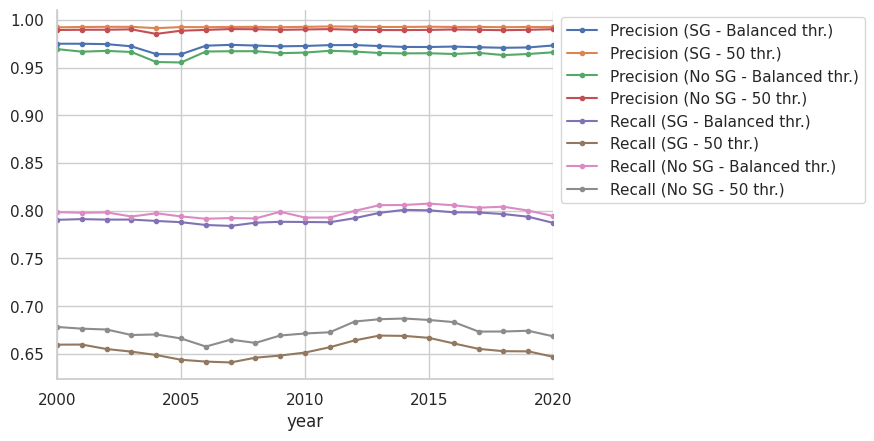

In [219]:
ax = acc_df[['year',
             'Precision (SG - Balanced thr.)', 'Precision (SG - 50 thr.)', 'Precision (No SG - Balanced thr.)', 'Precision (No SG - 50 thr.)', 
             'Recall (SG - Balanced thr.)', 'Recall (SG - 50 thr.)', 'Recall (No SG - Balanced thr.)', 'Recall (No SG - 50 thr.)'
]].set_index('year').plot(kind='line', style='.-')
ax.legend(bbox_to_anchor=(1.0, 1.0))

(0.4, 1.0)

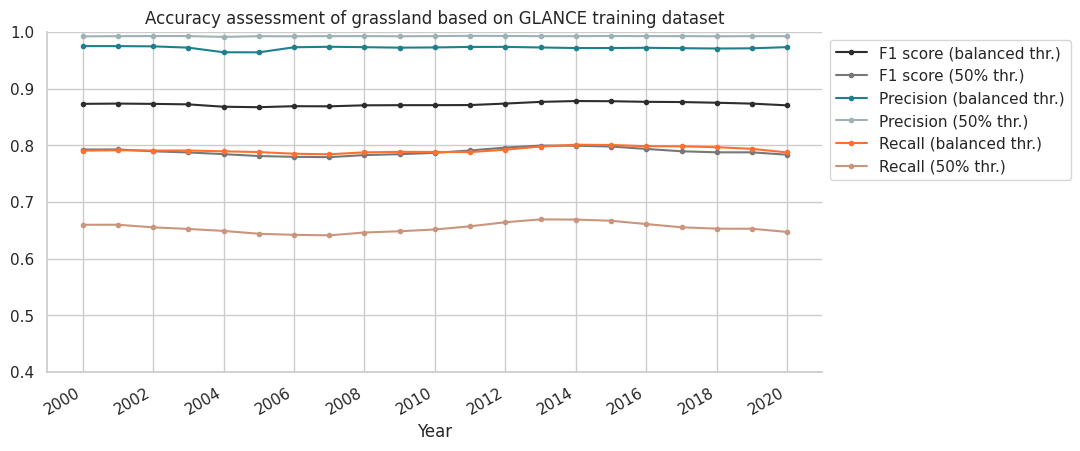

In [220]:
import seaborn as sns
import matplotlib.dates as mdates  

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook', style="whitegrid", rc=custom_params)
ax = acc_df[['year', 'f1', 'f1_50th',
             'Precision (SG - Balanced thr.)', 'Precision (SG - 50 thr.)',
             'Recall (SG - Balanced thr.)', 'Recall (SG - 50 thr.)'
]].rename(columns={
    'f1': 'F1 score (balanced thr.)',
    'f1_50th': 'F1 score (50% thr.)',
    'Precision (SG - Balanced thr.)': 'Precision (balanced thr.)',
    'Precision (SG - 50 thr.)': 'Precision (50% thr.)',
    'Recall (SG - Balanced thr.)': 'Recall (balanced thr.)',
    'Recall (SG - 50 thr.)': 'Recall (50% thr.)',
    'year': 'Year'
}).set_index('Year').plot(kind='line', style='.-', figsize=(10,5), color=['#2d2d2d','#777777', '#1d808c','#9db2b4','#ff6f2f','#cb957d'],  x_compat=True,
    title='Accuracy assessment of grassland based on GLANCE training dataset')

ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlim('1999-01-01','2021-01-01')
ax.set_ylim(0.40,1)

(0.6, 1.02)

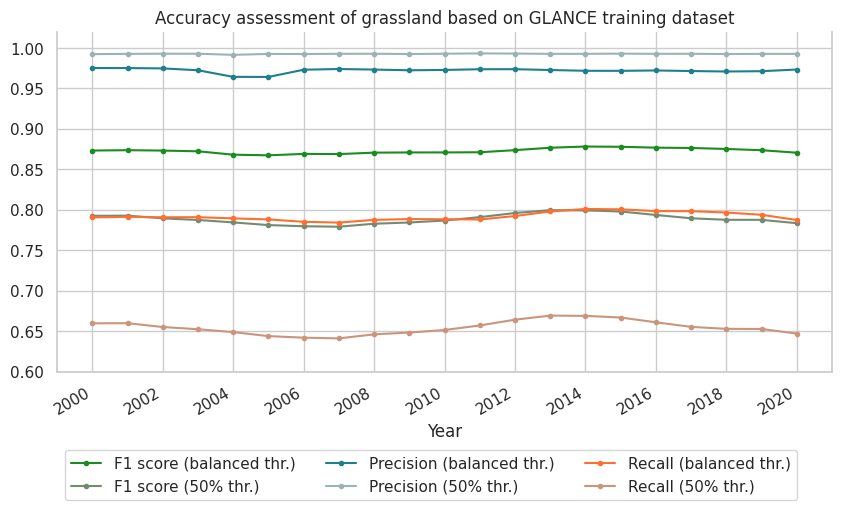

In [222]:
import seaborn as sns
import matplotlib.dates as mdates  
import matplotlib.pyplot as plt

custom_params = {"axes.spines.right": True, "axes.spines.top": False}
sns.set_theme(context='notebook', style="whitegrid", rc=custom_params)
ax = acc_df[['year', 'f1', 'f1_50th',
             'Precision (SG - Balanced thr.)', 'Precision (SG - 50 thr.)',
             'Recall (SG - Balanced thr.)', 'Recall (SG - 50 thr.)'
]].rename(columns={
    'f1': 'F1 score (balanced thr.)',
    'f1_50th': 'F1 score (50% thr.)',
    'Precision (SG - Balanced thr.)': 'Precision (balanced thr.)',
    'Precision (SG - 50 thr.)': 'Precision (50% thr.)',
    'Recall (SG - Balanced thr.)': 'Recall (balanced thr.)',
    'Recall (SG - 50 thr.)': 'Recall (50% thr.)',
    'year': 'Year'
}).set_index('Year').plot(kind='line', style='.-', figsize=(10,5), color=['#1b8c1f','#738b73', '#1d808c','#9db2b4','#ff6f2f','#cb957d'],  x_compat=True,
    title='Accuracy assessment of grassland based on GLANCE training dataset')

ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.legend(loc='lower left', ncol=3,
       bbox_to_anchor=(-0, -0.40))

ax.set_xlim('1999-01-01','2021-01-01')
ax.set_ylim(0.60,1.02)

#### Stability index

In [223]:
from sklearn.metrics import precision_score, recall_score, f1_score

si_df = []

for year, rows in glance_t.groupby('year'):
    r = rows[['x','y','rf.savgol.bthr', 'glance']].rename(columns={
        'glance': f'expected',
        'rf.savgol.bthr': f'predicted'
    })
    si_df.append({
        'precision': precision_score(r['expected'], r['predicted']),
        'recall': recall_score(r['expected'], r['predicted']),
        'f1_score': f1_score(r['expected'], r['predicted']),
        'year': year,
        'dataset_name': 'Glance'
    })

si_df = pd.DataFrame(si_df)
si_df = si_df[si_df['year'] <= 2018]
si_df

,precision,recall,f1_score,year,dataset_name
0,0.975026,0.790494,0.873117,2000,Glance
1,0.974991,0.791241,0.873557,2001,Glance
2,0.974592,0.790714,0.873077,2002,Glance
3,0.972292,0.790773,0.872188,2003,Glance
4,0.964150,0.789317,0.868017,2004,Glance
5,0.964022,0.788045,0.867196,2005,Glance
6,0.972952,0.785087,0.868982,2006,Glance
7,0.973836,0.784120,0.868741,2007,Glance
8,0.973135,0.787485,0.870522,2008,Glance
9,0.972286,0.788446,0.870768,2009,Glance


Glance
Precision    0.157362
Recall       0.211537
dtype: float64


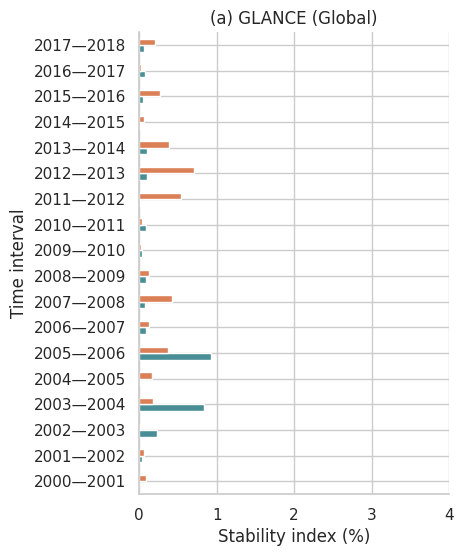

In [224]:
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook', style="whitegrid", rc=custom_params, palette='deep')

def calc_si(si_df, dataset_name, **kargs):

    si_df_sub = si_df[si_df['dataset_name'] == dataset_name]
    metrics = ['precision','recall']
    rename = { i:f'{str(metrics[i]).capitalize()}'  for i in range(0,len(metrics)) }

    acc_stats = si_df_sub[metrics].to_numpy()
    si_df_res = pd.DataFrame((np.abs(np.diff(acc_stats, n=1, axis=0)) / acc_stats[:-1,:]) * 100).rename(columns=rename)
    print(dataset_name)
    print(si_df_res.mean())
    si_df_res['Time interval'] = [ f'{y}—{y+1}' for y in range(si_df_sub['year'].min(), si_df_sub['year'].max()) ]
    
    si_df_res.set_index('Time interval').plot(kind='barh', style='.-', xlim=(0,4),  xlabel='Stability index (%)', figsize=(4,6), **kargs)
    
    #plt.savefig(f'si_{dataset_name}.pdf', bbox_inches='tight')

color=['#498e96','#da7f56']
calc_si(si_df, 'Glance', legend=False, color=color, title='(a) GLANCE (Global)')

### MapBiomas & LCMAP CONUS

In [269]:
import pandas as pd
samples_harm = pd.read_parquet('gpw_grassland_harm.db_validation.samples_20000101_20221231_go_epsg.4326_v1.pq')

db_harm = samples_harm[samples_harm['dataset_name'].isin(['LCMap-Conus','MapBiomas'])]

In [270]:
import pandas as pd
import numpy as np

db_harm = db_harm[np.logical_and.reduce([
    db_harm['gpw_lulc_class'].isin(['Crops and other related agricultural practices', 'Cultivated grassland', 'Other', 'Natural/Semi-natural grassland']),
    np.logical_not(np.isnan(db_harm['gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'])),
    np.logical_not(np.isnan(db_harm['gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1']))
])]
db_harm

,sample_id,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight,observation,x,y,ref_date,glad_tile_id,geometry,overlay_id,gpw_rf.seeded.grass_30m_m_0101_1231_go_epsg.4326_v20240206,gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1,gpw_rf.nat.semi.grass_30m_m_0101_1231_go_epsg.4326_v20240206,gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1,gpw_cultiv.grassland_rf.savgol.madi_p_30m_20000101_20221231_go_epsg.4326_v1,gpw_nat.semi.grassland_rf.savgol.madi_p_30m_20000101_20221231_go_epsg.4326_v1
55574412,2cf804a5346ddabffd4d99b036a5429d,MapBiomas,2000,Other,Other,85297.489049,None,-34.912163,-6.865013,2000-01-01,034W_06S,b'\x01\x01\x00\x00\x00\x9d\xe7\xdb\xc4\xc1tA\x...,1,4.0,4.0,0.0,0.0,0.0,0.0
55574413,ec0c4d64e3b6fefcd627f50aacab132c,MapBiomas,2000,Semi-perennial crop,Crops and other related agricultural practices,85297.489049,None,-34.901114,-6.896544,2000-01-01,034W_06S,b'\x01\x01\x00\x00\x00V\xc8\xc7\xb4WsA\xc0\xe6...,2,31.0,33.0,10.0,9.0,2.0,1.0
55574414,fd91a99564bba12c406197737d571b50,MapBiomas,2000,Perennial crop,Crops and other related agricultural practices,85297.489049,None,-34.926716,-6.956641,2000-01-01,034W_06S,b'\x01\x01\x00\x00\x00\xf0\xa9\xd6\xa1\x9evA\x...,3,25.0,27.0,6.0,4.0,2.0,1.0
55574415,5e52c9ab6c376ffdd686a538d76e841c,MapBiomas,2000,Semi-perennial crop,Crops and other related agricultural practices,85297.489049,None,-34.915397,-6.885495,2000-01-01,034W_06S,b'\x01\x01\x00\x00\x00\xd2\xb2\x07\xbd+uA\xc0\...,4,30.0,30.0,7.0,8.0,2.0,1.0
55574416,cd60b0f605763ad8852bab4e505da130,MapBiomas,2000,Forest formation,Other,85297.489049,None,-34.988700,-6.714905,2000-01-01,034W_06S,b'\x01\x01\x00\x00\x00\x05;8\xb7\x8d~A\xc04\n\...,5,5.0,5.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66010774,bbe8bbd01f5e8debe8f547928c6d4597,LCMap-Conus,2014,Tree Cover,Other,1.000000,None,-124.653502,48.163863,2014-01-01,124W_48N,b'\x01\x01\x00\x00\x00\xeb\xb8\x7f\xf9\xd2)_\x...,11,4.0,3.0,1.0,0.0,3.0,2.0
66010785,bbe8bbd01f5e8debe8f547928c6d4597,LCMap-Conus,2015,Tree Cover,Other,1.000000,None,-124.653502,48.163863,2015-01-01,124W_48N,b'\x01\x01\x00\x00\x00\xeb\xb8\x7f\xf9\xd2)_\x...,11,4.0,3.0,0.0,0.0,3.0,2.0
66010796,bbe8bbd01f5e8debe8f547928c6d4597,LCMap-Conus,2016,Tree Cover,Other,1.000000,None,-124.653502,48.163863,2016-01-01,124W_48N,b'\x01\x01\x00\x00\x00\xeb\xb8\x7f\xf9\xd2)_\x...,11,4.0,3.0,0.0,0.0,3.0,2.0
66010807,bbe8bbd01f5e8debe8f547928c6d4597,LCMap-Conus,2017,Tree Cover,Other,1.000000,None,-124.653502,48.163863,2017-01-01,124W_48N,b'\x01\x01\x00\x00\x00\xeb\xb8\x7f\xf9\xd2)_\x...,11,4.0,4.0,0.0,0.0,3.0,2.0


In [271]:
db_harm.loc[db_harm['original_lulc_class'] == 'Spontaneously vegetated surfaces', 'gpw_lulc_class'] = 'Natural and Semi-natural grass'
db_harm.loc[db_harm['original_lulc_class'] == 'Lichen or moss', 'gpw_lulc_class'] = 'Natural and Semi-natural grass'

db_harm['gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1'] = np.logical_or(db_harm['gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 32, db_harm['gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 42).astype('int')

db_harm['gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 0
db_harm.loc[(db_harm['gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 32), 'gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 1
db_harm.loc[(db_harm['gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 42), 'gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 2

In [272]:
db_harm.loc[:,'gpw_class_lvl1'] = db_harm['gpw_lulc_class'].map({
       'Crops and other related agricultural practices': 0,
       'Other': 0,
       'Cultivated grassland': 1,
       'Natural/Semi-natural grassland': 1
})

In [273]:
db_harm.loc[:,'gpw_class_lvl2'] = db_harm['gpw_lulc_class'].map({
       'Crops and other related agricultural practices': 0,
       'Other': 0,
       'Cultivated grassland': 1,
       'Natural/Semi-natural grassland': 2
})

In [276]:
db_temporal = None

for year, rows in db_harm.groupby('reference_year'):
    r = rows[['sample_id', 'x','y','dataset_name','gpw_class_lvl1', 'gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1']].rename(columns={
        'gpw_class_lvl1': f'expected_{year}',
        'gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1': f'predicted_{year}'
    })
    if db_temporal is None:
        db_temporal = r
    else:
        db_temporal = db_temporal.merge(r[['sample_id', f'expected_{year}',f'predicted_{year}']], on='sample_id', how='inner', suffixes=('', ''))
    print(f"Number of sample for {year}: {db_temporal.shape}")

Number of sample for 2000: (76062, 6)
Number of sample for 2001: (76051, 8)
Number of sample for 2002: (76035, 10)
Number of sample for 2003: (75994, 12)
Number of sample for 2004: (75973, 14)
Number of sample for 2005: (75961, 16)
Number of sample for 2006: (75946, 18)
Number of sample for 2007: (75933, 20)
Number of sample for 2008: (75928, 22)
Number of sample for 2009: (75918, 24)
Number of sample for 2010: (75898, 26)
Number of sample for 2011: (75874, 28)
Number of sample for 2012: (75858, 30)
Number of sample for 2013: (75843, 32)
Number of sample for 2014: (75826, 34)
Number of sample for 2015: (75806, 36)
Number of sample for 2016: (75764, 38)
Number of sample for 2017: (75660, 40)
Number of sample for 2018: (75325, 42)


In [277]:
from sklearn.metrics import precision_score, recall_score, f1_score

si_df_nat = []

for (year, dataset_name), rows in db_harm.groupby(['reference_year','dataset_name']):
    r = rows[['sample_id', 'x','y','dataset_name','gpw_class_lvl1', 'gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1']].rename(columns={
        'gpw_class_lvl1': f'expected',
        'gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1': f'predicted'
    })
    si_df_nat.append({
        'precision': precision_score(r['expected'], r['predicted']),
        'recall': recall_score(r['expected'], r['predicted']),
        'f1_score': f1_score(r['expected'], r['predicted']),
        'year': year,
        'dataset_name': dataset_name
    })

si_df_nat = pd.DataFrame(si_df_nat)

MapBiomas
Precision    0.530070
Recall       1.353282
dtype: float64
LCMap-Conus
Precision    0.410916
Recall       0.770069
dtype: float64


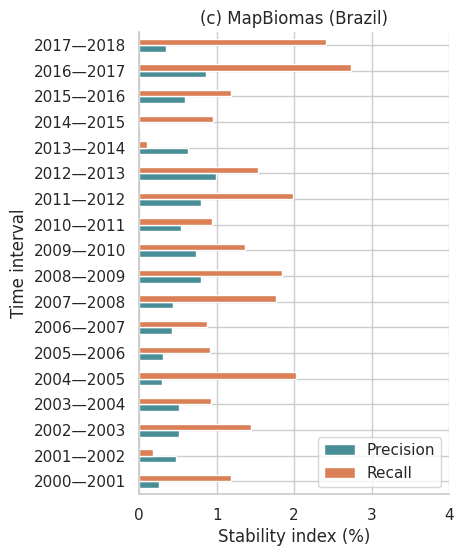

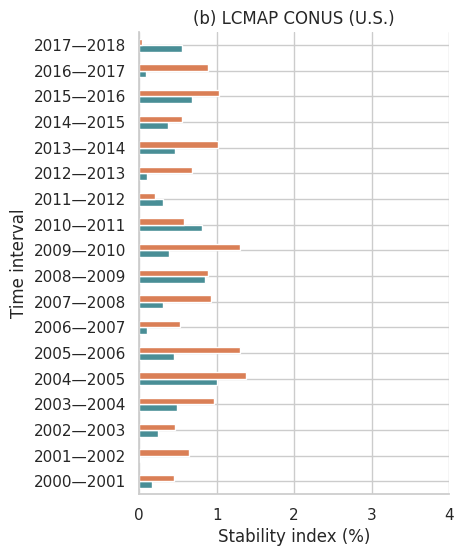

In [283]:
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook', style="whitegrid", rc=custom_params, palette='deep')

def calc_si(si_df, dataset_name, **kargs):

    si_df_sub = si_df[si_df['dataset_name'] == dataset_name]
    metrics = ['precision','recall']
    rename = { i:f'{str(metrics[i]).capitalize()}'  for i in range(0,len(metrics)) }

    acc_stats = si_df_sub[metrics].to_numpy()
    si_df_res = pd.DataFrame((np.abs(np.diff(acc_stats, n=1, axis=0)) / acc_stats[:-1,:]) * 100).rename(columns=rename)
    print(dataset_name)
    print(si_df_res.mean())
    si_df_res['Time interval'] = [ f'{y}—{y+1}' for y in range(si_df_sub['year'].min(), si_df_sub['year'].max()) ]
    
    si_df_res.set_index('Time interval').plot(kind='barh', style='.-', xlim=(0,4),  xlabel='Stability index (%)', figsize=(4,6), **kargs)
    #plt.savefig(f'si_{dataset_name}.pdf', bbox_inches='tight')

color=['#498e96','#da7f56']
calc_si(si_df_nat, 'MapBiomas', color=color, title='(c) MapBiomas (Brazil)')
calc_si(si_df_nat,'LCMap-Conus', legend=False, color=color, title='(b) LCMAP CONUS (U.S.)')
#ax.legend(bbox_to_anchor=(1.0, 1.0))

### Other datasets

In [ ]:
#import pandas as pd
#samples_harm = pd.read_parquet('gpw_grassland_harm.db_validation.samples_20000101_20221231_go_epsg.4326_v1.pq')

In [288]:
samples_harm.loc[samples_harm['original_lulc_class'] == 'Spontaneously vegetated surfaces', 'gpw_lulc_class'] = 'Natural and Semi-natural grass'
samples_harm.loc[samples_harm['original_lulc_class'] == 'Lichen or moss', 'gpw_lulc_class'] = 'Natural and Semi-natural grass'

samples_harm['gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1'] = np.logical_or(samples_harm['gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 32, samples_harm['gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 42).astype('int')

samples_harm['gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 0
samples_harm.loc[(samples_harm['gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 32), 'gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 1
samples_harm.loc[(samples_harm['gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 42), 'gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 2

In [289]:
samples_harm.loc[:,'gpw_class_lvl1'] = samples_harm['gpw_lulc_class'].map({
       'Crops and other related agricultural practices': 0,
       'Other': 0,
       'Cultivated grassland': 1,
       'Natural/Semi-natural grassland': 1
})

In [294]:
from sklearn.metrics import classification_report

datasets = samples_harm['dataset_name'].unique()

for d in datasets:
    print('#################')
    print(f"Dataset: {d}")
    print('#################')
    mask = np.logical_and((samples_harm['dataset_name'] == d), np.logical_not(np.isnan(samples_harm['gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1'])))
    print(classification_report(samples_harm[mask]['gpw_class_lvl1'], samples_harm[mask]['gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1']))

#################
Dataset: GeoWiki
#################
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79    106930
         1.0       0.48      0.50      0.49     42611

    accuracy                           0.70    149541
   macro avg       0.64      0.64      0.64    149541
weighted avg       0.71      0.70      0.70    149541

#################
Dataset: WorldCereal
#################
              precision    recall  f1-score   support

         0.0       0.68      0.93      0.78  20917359
         1.0       0.84      0.47      0.61  17347141

    accuracy                           0.72  38264500
   macro avg       0.76      0.70      0.70  38264500
weighted avg       0.75      0.72      0.70  38264500

#################
Dataset: CGLS-LC
#################


/home/opengeohub/.local/lib/python3.8/site-packages/sklearn/utils/_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.